This notebook shows how to plot the psychometric curve of the data in a session from the IBL DataJoint database

Here we first import some modules from the ibl pipeline and some other modules

In [39]:
# behavior data
from ibl_pipeline import behavior

# analyzed result of behavioral data
from ibl_pipeline.analyses import behavior as behavior_analyses

# meta information of the subject and session
from ibl_pipeline import subject, acquisition

# Function to perform the model fits of the psychometric function
from ibl_pipeline.utils import psychofit as psy

# some regular modules
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
%matplotlib notebook

The fit results of the psychometric curve are saved in the table `behavior_analyses.PsychResultsBlock`, we can browse entries in the table for a particular subject, the prob_left_block marks which prior of probability left have been used in the block

In [14]:
q = behavior_analyses.PsychResultsBlock & (subject.Subject & 'subject_nickname="CSHL_015"')
q

subject_uuid,session_start_time start time,prob_left_block block number representing the probability left,"prob_left 0.5 for trainingChoiceWorld, actual value for biasedChoiceWorld","signed_contrasts contrasts used in this session, negative when on the left",n_trials_stim number of trials for each contrast,"n_trials_stim_right number of reporting ""right"" trials for each contrast","prob_choose_right probability of choosing right, same size as contrasts",threshold,bias,lapse_low,lapse_high
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-18 15:56:22,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.3704,99.8873,0.447067,0.712237
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-19 16:36:59,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.8626,-37.9186,0.903226,0.266667
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-20 16:31:05,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,20.8793,-51.8636,0.311381,0.797244
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-21 17:06:45,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,43.6068,-99.9999,0.11875,0.71875
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-24 16:19:57,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.2418,-35.3111,0.0684932,0.797368
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-25 17:56:12,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,20.0873,57.0892,8.05743e-13,0.945584
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-26 18:14:18,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,0.000121293,-49.9999,0.0446529,0.324884
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-27 15:46:09,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.2522,-38.682,0.0930232,0.461078
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-06-28 12:08:42,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.6158,25.8663,0.00706714,0.47343
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-07-01 13:07:47,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,5.11152,-43.0984,0.057377,0.247059


Let's check the results of sessions collected after 2019-09-15, by:

In [18]:
q & 'session_start_time > "2019-09-15"'

subject_uuid,session_start_time start time,prob_left_block block number representing the probability left,"prob_left 0.5 for trainingChoiceWorld, actual value for biasedChoiceWorld","signed_contrasts contrasts used in this session, negative when on the left",n_trials_stim number of trials for each contrast,"n_trials_stim_right number of reporting ""right"" trials for each contrast","prob_choose_right probability of choosing right, same size as contrasts",threshold,bias,lapse_low,lapse_high
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,20,0.2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,44.929,-12.7676,0.0582509,0.0621766
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,53.3714,20.2507,8.94956e-13,0.128377
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,80,0.8,=BLOB=,=BLOB=,=BLOB=,=BLOB=,80.6509,65.2483,8.30313e-13,0.0901264
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-17 12:53:25,20,0.2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,55.6984,-18.3859,0.0696535,0.0661889
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-17 12:53:25,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,6.35501,5.85743,0.0644321,1.0
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-17 12:53:25,80,0.8,=BLOB=,=BLOB=,=BLOB=,=BLOB=,17.7491,0.0140995,4.20461e-12,0.588134


Let's plot the psychometric curve of the last session on 9/17, containing three blocks with `prob_left` 0.2, 0.5 and 0.8

In [34]:
psych_results = q & {'session_start_time': datetime.datetime(2019, 9, 16, 13, 44, 46)}
psych_results

subject_uuid,session_start_time start time,prob_left_block block number representing the probability left,"prob_left 0.5 for trainingChoiceWorld, actual value for biasedChoiceWorld","signed_contrasts contrasts used in this session, negative when on the left",n_trials_stim number of trials for each contrast,"n_trials_stim_right number of reporting ""right"" trials for each contrast","prob_choose_right probability of choosing right, same size as contrasts",threshold,bias,lapse_low,lapse_high
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,20,0.2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,44.929,-12.7676,0.0582509,0.0621766
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,50,0.5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,53.3714,20.2507,8.94956e-13,0.128377
10fd3170-6c52-4cb6-986f-aa73704277c0,2019-09-16 13:44:46,80,0.8,=BLOB=,=BLOB=,=BLOB=,=BLOB=,80.6509,65.2483,8.30313e-13,0.0901264


Now let's fetch the fit parameters and behavioral statistics from the table as a list of dictionaries.

In [35]:
dict_results = psych_results.fetch(
    'signed_contrasts', 'prob_choose_right', 'n_trials_stim', 'n_trials_stim_right',
    'threshold', 'bias', 'lapse_low', 'lapse_high', as_dict=True)

In [36]:
dict_results

[{'signed_contrasts': array([-1.    , -0.25  , -0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,
          0.25  ,  1.    ]),
  'n_trials_stim': array([16, 19, 18, 23, 89, 80, 73, 79, 65]),
  'n_trials_stim_right': array([ 1,  6, 10, 15, 52, 61, 52, 66, 61]),
  'prob_choose_right': array([0.0625    , 0.31578947, 0.55555556, 0.65217391, 0.58426966,
         0.7625    , 0.71232877, 0.83544304, 0.93846154]),
  'threshold': 44.929,
  'bias': -12.7676,
  'lapse_low': 0.0582509,
  'lapse_high': 0.0621766},
 {'signed_contrasts': array([-1.    , -0.25  , -0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,
          0.25  ,  1.    ]),
  'n_trials_stim': array([12,  9,  6,  8, 15,  6,  8, 12, 14]),
  'n_trials_stim_right': array([ 0,  1,  0,  3,  3,  4,  1,  6, 12]),
  'prob_choose_right': array([0.        , 0.11111111, 0.        , 0.375     , 0.2       ,
         0.66666667, 0.125     , 0.5       , 0.85714286]),
  'threshold': 53.3714,
  'bias': 20.2507,
  'lapse_low': 8.94956e-13,
  'lapse_high': 0.128377

Next let's loop through the blocks and plot the psychometric curves:

<IPython.core.display.Javascript object>


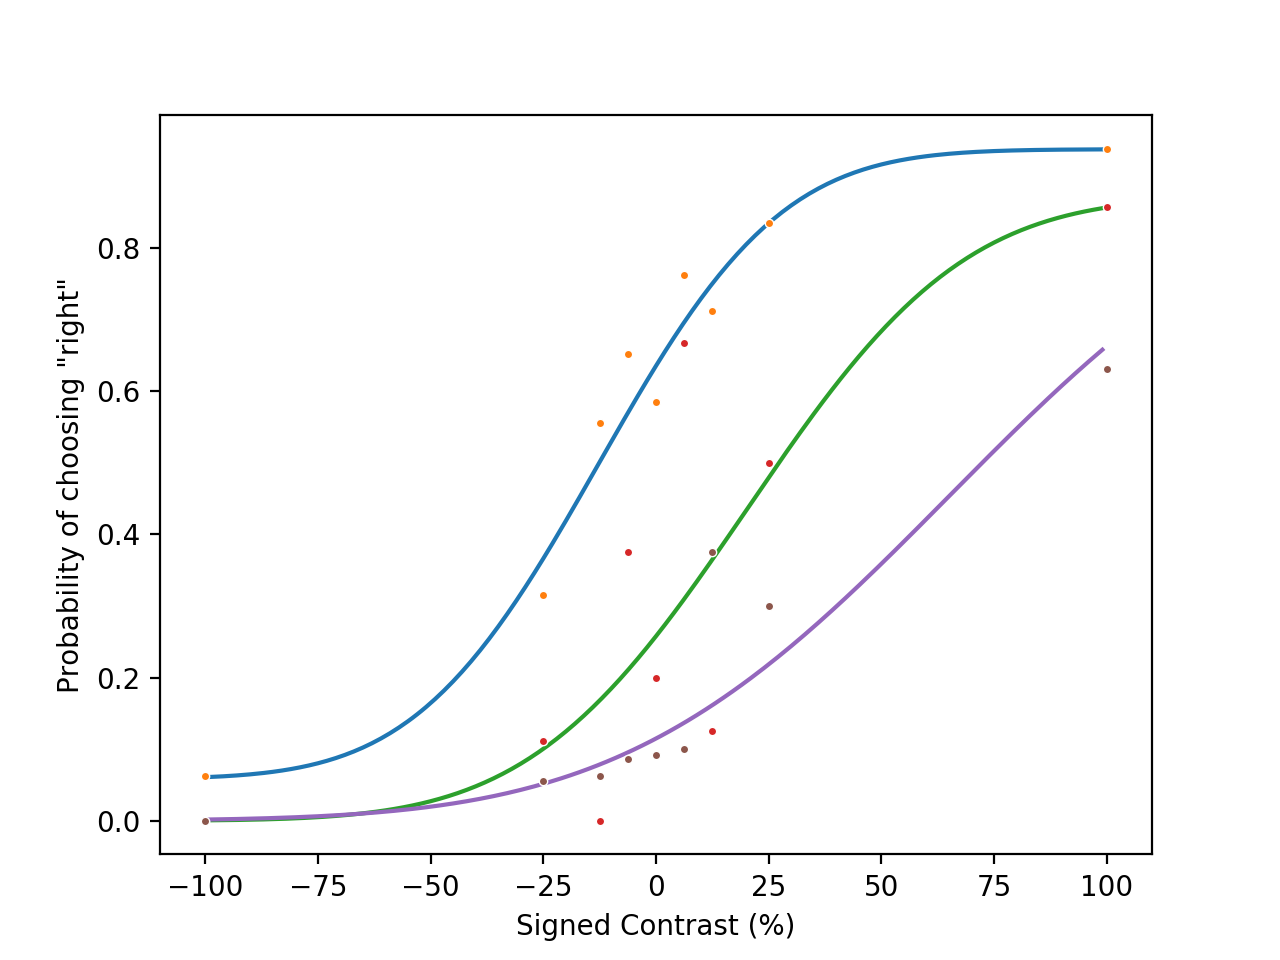

Text(0, 0.5, 'Probability of choosing "right"')

In [40]:
colors = [[1., 1., 0.], [0., 0., 0.], [0., 0., 1.]]
for result in dict_results:
    pars = [result['bias'], result['threshold'], result['lapse_low'], result['lapse_high']]
    contrasts = result['signed_contrasts'] * 100
    contrasts_fit = np.arange(-100, 100)
    prob_right_fit = psy.erf_psycho_2gammas(pars, contrasts_fit)
    sns.lineplot(contrasts_fit, prob_right_fit)
    sns.lineplot(x=contrasts, y=result['prob_choose_right'], err_style="bars", linewidth=0, linestyle='None', mew=0.5,
            marker='.', ci=68, color=colo)

plt.gca().set_xlabel('Signed Contrast (%)')
plt.gca().set_ylabel('Probability of choosing "right"')